In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

# Hierarchical Clustering

In [2]:
crime=pd.read_csv("F:\Data science\Assginment\Assginment 7(clustering)\crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime2 = crime.rename({'Unnamed: 0': 'city'}, axis=1)
crime2

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:>

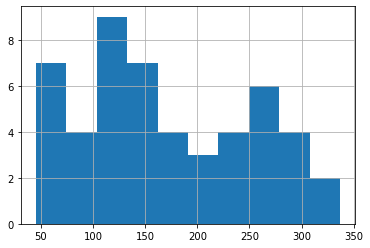

In [4]:
crime2['Assault'].hist()

In [5]:
crime2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [7]:
crime3 = norm_func(crime2.iloc[:,1:])
crime3

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


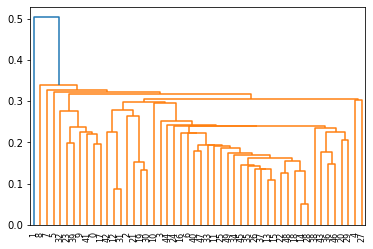

In [8]:
dendrogram = sch.dendrogram(sch.linkage(crime3, method='single'))

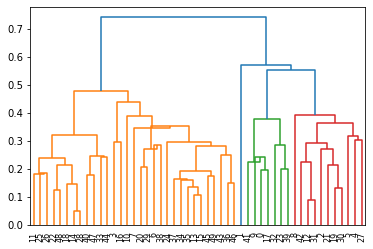

In [9]:
dendrogram = sch.dendrogram(sch.linkage(crime3, method='centroid'))

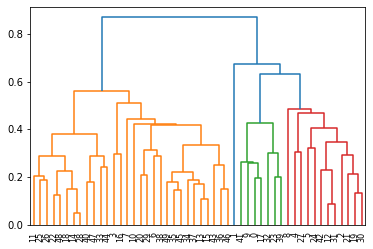

In [10]:
dendrogram = sch.dendrogram(sch.linkage(crime3, method='average'))

In [11]:
crime4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')
crime4

AgglomerativeClustering(linkage='single', n_clusters=4)

In [12]:
y_hc = crime4.fit_predict(crime3)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [13]:
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,0
6,0
7,1
8,2
9,0


# DBSCAN 

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [25]:
data = pd.read_csv("F:\Data science\Assginment\Assginment 7(clustering)\crime_data.csv");

data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [18]:
data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [19]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB
None


In [27]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)
data

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [31]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [32]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [34]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [36]:
dbscan = DBSCAN(eps=0.6, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.6, min_samples=6)

In [37]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [38]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [40]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [41]:
pd.concat([df,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,-1
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,-1
3,Arkansas,8.8,190,50,19.5,-1
4,California,9.0,276,91,40.6,-1
5,Colorado,7.9,204,78,38.7,-1
6,Connecticut,3.3,110,77,11.1,-1
7,Delaware,5.9,238,72,15.8,-1
8,Florida,15.4,335,80,31.9,-1
9,Georgia,17.4,211,60,25.8,-1


# K-mean 

In [42]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import numpy as np


In [44]:
crimedata = pd.read_csv("F:\\Data science\\Assginment\\Assginment 7(clustering)\\crime_data.csv")
crimedata


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


<AxesSubplot:xlabel='X', ylabel='Y'>

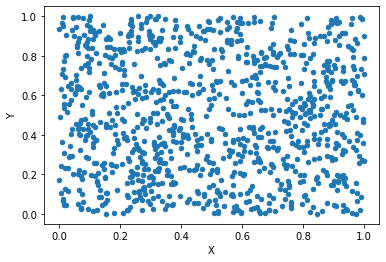

In [45]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X
df_xy.Y = Y
df_xy.plot(x="X",y = "Y",kind="scatter")

In [46]:
X = np.random.uniform(0,1,1000)
X

array([3.08448431e-01, 9.66298713e-01, 6.38045735e-01, 8.90282893e-01,
       6.44007178e-01, 5.42706030e-01, 6.63393573e-01, 5.69114501e-02,
       4.75272579e-01, 2.60212169e-02, 4.31099354e-01, 2.58063077e-02,
       8.38162013e-01, 9.23060933e-01, 5.37095289e-01, 2.93924648e-01,
       3.89069706e-01, 4.73343566e-01, 4.11356717e-01, 3.86484269e-01,
       1.13567540e-01, 8.29163708e-01, 1.08039686e-01, 4.08611404e-01,
       1.53180059e-01, 2.80900861e-01, 6.23533748e-01, 6.76053397e-01,
       9.75903767e-01, 2.46228686e-01, 1.13549224e-01, 6.24790686e-01,
       2.26434105e-01, 3.52903015e-01, 7.51448608e-01, 4.31111579e-01,
       7.23435486e-01, 2.78957572e-01, 7.01247814e-01, 2.12579691e-01,
       9.37706126e-01, 1.73683360e-01, 9.15215133e-01, 2.52078568e-01,
       4.91664794e-01, 5.05101898e-01, 6.08564868e-01, 1.77392710e-01,
       3.67044342e-01, 6.59419175e-01, 5.02729790e-01, 7.57580987e-01,
       8.07656608e-01, 4.72759915e-01, 3.33459953e-01, 5.99277799e-01,
      

<AxesSubplot:xlabel='X', ylabel='Y'>

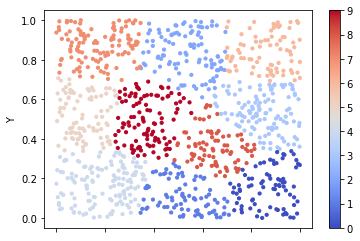

In [47]:
model1 = KMeans(n_clusters=10).fit(df_xy)

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",s=10,cmap=plt.cm.coolwarm)


In [50]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

df_norm = norm_func(crimedata.iloc[:,1:])
df_norm.head(8)  

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638


In [51]:
model=KMeans(n_clusters=10) 
model.fit(df_norm)

model.labels_

array([3, 8, 7, 5, 2, 1, 4, 4, 7, 3, 4, 0, 7, 5, 0, 5, 5, 3, 6, 7, 4, 7,
       0, 9, 1, 5, 0, 2, 0, 4, 7, 7, 9, 6, 4, 5, 1, 4, 4, 9, 6, 3, 7, 4,
       6, 5, 1, 6, 0, 5])

In [54]:
md=pd.Series(model.labels_)  
crimedata['clust']=md               
df_norm.head()

md=pd.Series(model.labels_)
crimedata['clust']=md
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [56]:
crimedata.iloc[:,1:7].groupby(crimedata.clust).mean()

,Murder,Assault,UrbanPop,Rape,clust
clust,,,,,
0,2.750000,76.666667,60.166667,12.866667,0.0
1,6.450000,171.500000,72.000000,30.600000,1.0
2,10.600000,264.000000,86.000000,43.300000,2.0
3,14.800000,221.000000,60.750000,24.025000,3.0
4,5.166667,135.777778,80.000000,16.633333,4.0
5,7.450000,138.000000,59.625000,18.437500,5.0
6,2.920000,68.600000,42.200000,9.680000,6.0
7,11.562500,271.625000,77.500000,29.187500,7.0
8,10.000000,263.000000,48.000000,44.500000,8.0


In [58]:
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clust
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,8
2,Arizona,8.1,294,80,31.0,7
3,Arkansas,8.8,190,50,19.5,5
4,California,9.0,276,91,40.6,2


# 2nd Dataset

In [62]:
airline=pd.read_csv("F:\\Data science\\Assginment\\Assginment 7(clustering)\\airlines.csv")
airline

,East-West Airlines is trying to learn more about its customers. Key issues are their,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,"flying patterns, earning and use of frequent f...",NaN,NaN,NaN,NaN
1,card. The task is to identify customer segmen...,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,Source: Based upon real business data; company...,NaN,NaN,NaN,NaN
5,(c) 2016 Galit Shmueli and Peter Bruce,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN
8,Field Name,Data Type,Max Data Length,Raw Data or Telcom Created Field?,Description
9,ID#,NUMBER,NaN,Telcom,Unique ID
